**Bankga mijozlarining qarzni qaytarish prognozi**

**Kerakli kutubxonalarni yuklash**

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**Datasetni yuklash va tahlil qilish**

In [58]:
# Train ma'lumotlarini yuklash
train_data = pd.read_csv("train.csv")

# Test ma'lumotlarini yuklash
test_data = pd.read_csv("test.csv")

In [59]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15702656.0,Nwora,567.0,France,Male,33.0,9.0,0.0,2.0,1.0,0.0,156792.89,0.0
1,1,15647965.0,Yevdokimova,628.0,France,Female,38.0,3.0,0.0,1.0,1.0,1.0,51987.99,1.0
2,2,15798834.0,Ch'iu,635.0,France,Female,29.0,3.0,0.0,2.0,1.0,1.0,113079.19,0.0
3,3,15672056.0,Hsia,681.0,France,Male,28.0,6.0,0.0,2.0,1.0,0.0,14081.64,0.0
4,4,15759537.0,Okwudilichukwu,587.0,France,Female,27.0,5.0,0.0,2.0,1.0,0.0,158958.90,0.0


In [60]:
test_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15732563.0,Hs?,707.0,Germany,Male,21.0,4.0,114513.66,2.0,1.0,0.0,176692.87
1,15001,15727041.0,Ma,678.0,Germany,Male,33.0,5.0,142510.50,1.0,0.0,0.0,52820.13
2,15002,15753679.0,K?,636.0,Spain,Male,45.0,9.0,0.00,2.0,1.0,1.0,125062.02
3,15003,15581554.0,H?,697.0,Spain,Male,46.0,8.0,0.00,2.0,1.0,0.0,131647.41
4,15004,15773723.0,Bellucci,553.0,Spain,Male,31.0,2.0,0.00,2.0,1.0,0.0,58814.41


In [61]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [62]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10000 non-null  int64  
 1   CustomerId       10000 non-null  float64
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  float64
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  float64
 10  HasCrCard        10000 non-null  float64
 11  IsActiveMember   10000 non-null  float64
 12  EstimatedSalary  10000 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 1015.8+ KB


In [63]:
train_data.isnull().sum()

,0
id,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [64]:
test_data.isnull().sum()

,0
id,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [65]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
train_data['Geography']=encoder.fit_transform(train_data['Geography'].values)
train_data['Gender']=encoder.fit_transform(train_data['Gender'].values)
train_data['Surname']=encoder.fit_transform(train_data['Surname'].values)
test_data['Geography']=encoder.fit_transform(test_data['Geography'].values)
test_data['Gender']=encoder.fit_transform(test_data['Gender'].values)
test_data['Surname']=encoder.fit_transform(test_data['Surname'].values)

**Train_datani "imbalanced data" uchun tekshiramiz**

In [66]:
train_data['Exited'].value_counts()

,count
Exited,
0.0,12023
1.0,2977


In [67]:
train_data['Exited'].value_counts(normalize=True) * 100

,proportion
Exited,
0.0,80.153333
1.0,19.846667


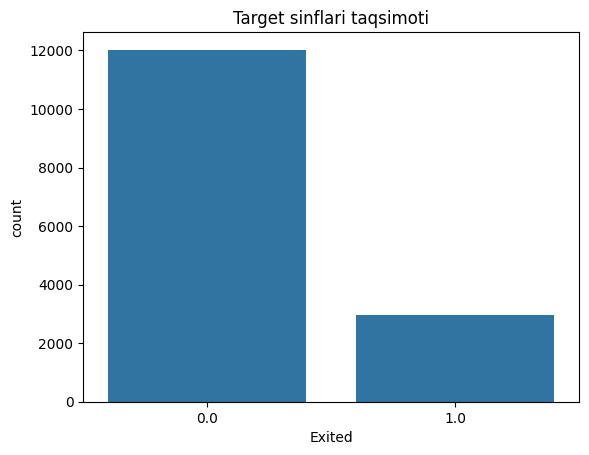

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=train_data, x='Exited')
plt.title('Target sinflari taqsimoti')
plt.show()


In [69]:
# X_train, y_train ajratish
X_train = train_data.drop(columns=["Exited", "id"])  # 'Id' va 'Exited' ni olib tashlaymiz
y_train = train_data["Exited"]
# X_test tayyorlash
X_test = test_data.drop(columns=["id"])

In [70]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest modelini tanlash — class_weight='balanced' qo‘shildi
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  # <- bu yerga e’tibor bering
)

# Modelni o‘rgatish
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [71]:
# Test ma'lumotlarida bashorat qilish
y_pred = model.predict(X_test)

In [72]:
# Id va Exited ustunlarini saqlash
submission = pd.DataFrame({
    "id": test_data["id"],
    "Exited": y_pred
})

# CSV fayliga saqlash
submission.to_csv("submission_RandomForest.csv", index=False)

print("Javob fayli muvaffaqiyatli saqlandi!")

Javob fayli muvaffaqiyatli saqlandi!


**RandomForestClassifier modelida accuracy=0.796 ga teng bo'ldi**

**XGBoosting**

In [73]:
from xgboost import XGBClassifier
scale_pos_weight = 8

# XGBoost modelini tanlash — imbalanced data uchun scale_pos_weight ishlatilgan
model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,   # Warning chiqmasligi uchun
    eval_metric='logloss',     # Binary classification uchun kerakli metric
    scale_pos_weight=scale_pos_weight
)

# Modelni o‘qitish
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:30:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [74]:
# Test ma'lumotlarida bashorat qilish
y_pred = model.predict(X_test)

In [75]:
# Id va Exited ustunlarini saqlash
submission = pd.DataFrame({
    "id": test_data["id"],
    "Exited": y_pred
})

# CSV fayliga saqlash
submission.to_csv("submission_XGBoost.csv", index=False)

print("Javob fayli muvaffaqiyatli saqlandi!")

Javob fayli muvaffaqiyatli saqlandi!


**XGBoost algoritmida accuracy=0.85 ga teng bo'ldi**